# Data Exploration

This notebook explores the used car dataset to understand its structure,distributions, and potential issues such as missing values and outliers.

### Load Raw Dataset
We load the dataset from `data/raw/used_cars.csv` to examine its structure and contents.


In [ ]:
import pandas as pd

df = pd.read_csv('../data/raw/used_cars.csv')
df.head()


ModuleNotFoundError: No module named 'pandas'

### Dataset Info
Check column types and total entries.


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


## Missing Values

In [ ]:
df.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

### Exploratory Data Analysis (EDA)
We visualize distributions and relationships:
- Mileage vs Price
- Engine capacity vs Price
- Brand distribution


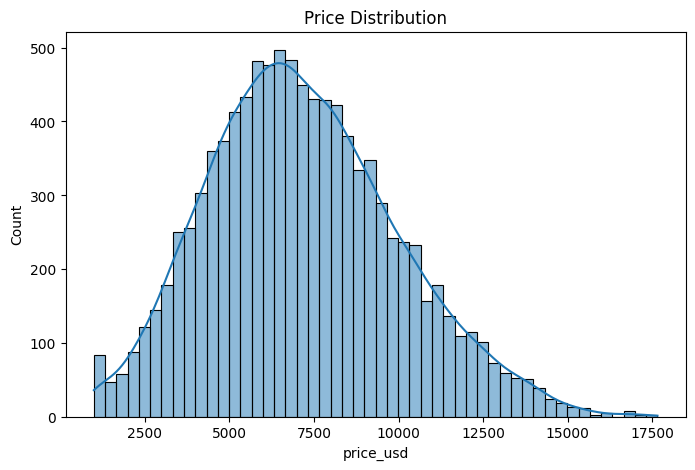

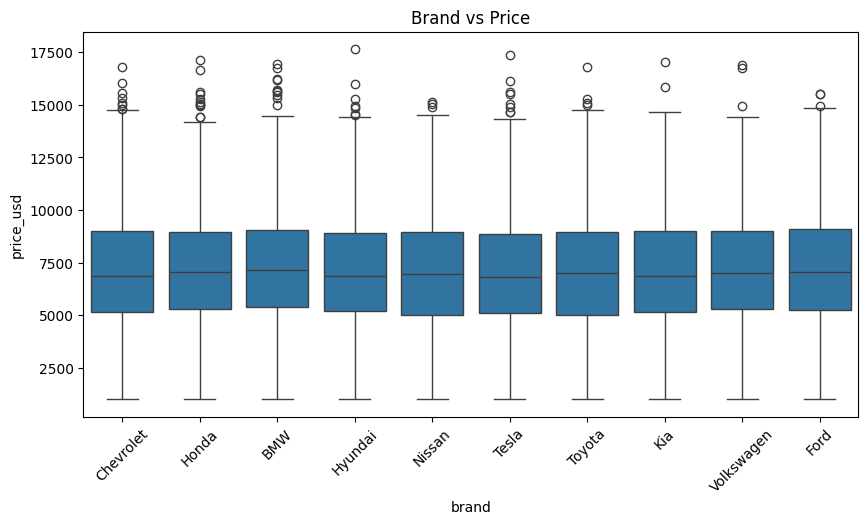

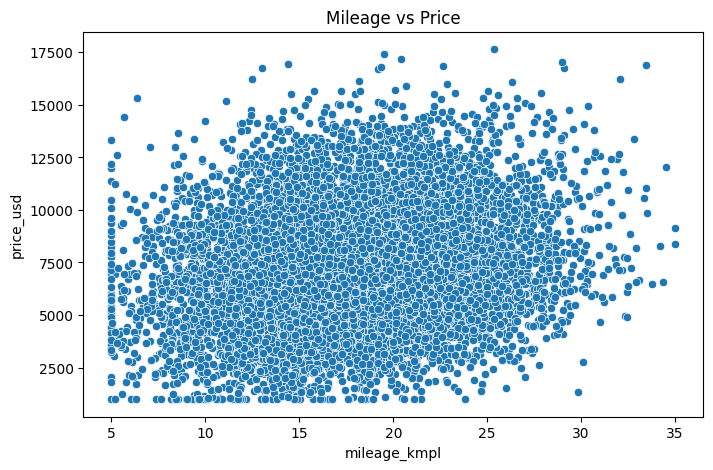

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price_usd'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# Brand vs Price boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='brand', y='price_usd', data=df)
plt.xticks(rotation=45)
plt.title("Brand vs Price")
plt.show()

# Mileage vs Price scatter
plt.figure(figsize=(8,5))
sns.scatterplot(x='mileage_kmpl', y='price_usd', data=df)
plt.title("Mileage vs Price")
plt.show()


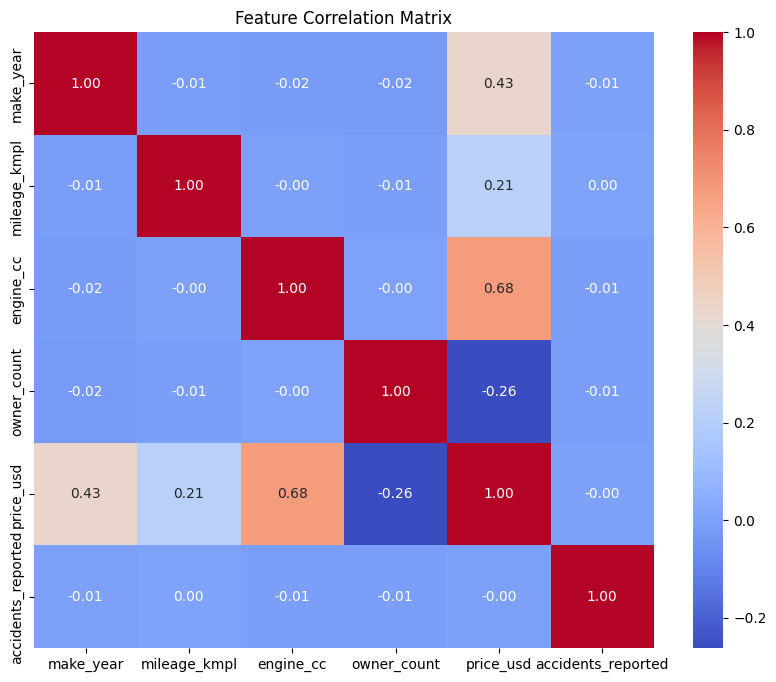

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### Observations
- Some brands have higher prices (e.g., BMW, Tesla).  
- Mileage positively affects price.  
- Missing values exist in `service_history`.  
- Dataset is unbalanced for certain brands.
